In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('dataset_brain.txt', comment='#', sep='\s+')
df.head()

,gender,age-group,head-size,brain-weight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


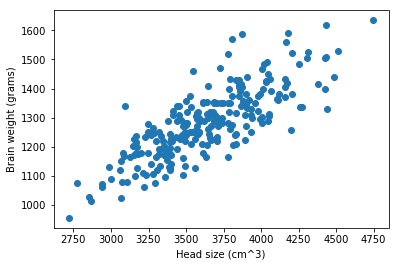

In [5]:
plt.scatter(df['head-size'], df['brain-weight'])
plt.xlabel('Head size (cm^3)')
plt.ylabel('Brain weight (grams)');

In [6]:
y = df['brain-weight'].values
y.shape

(237,)

In [9]:
X = df['head-size'].values
X = X.reshape(X.shape[0], 1)
X.shape

(237, 1)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=100)

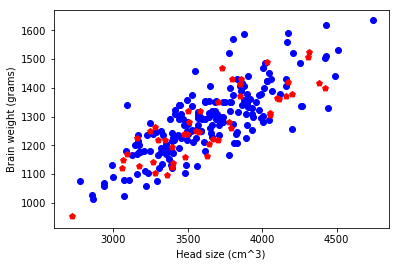

In [15]:
plt.scatter(X_train, y_train, c='blue', marker='o')
plt.scatter(X_test, y_test, c='red', marker='p')
plt.xlabel('Head size (cm^3)')
plt.ylabel('Brain weight (grams)');

In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [18]:
lr.score(X_test, y_test)

0.68879769950865688

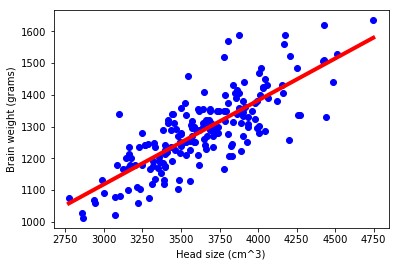

In [19]:
min_pred = X_train.min() * lr.coef_ + lr.intercept_
max_pred = X_train.max() * lr.coef_ + lr.intercept_

plt.scatter(X_train, y_train, c='blue', marker='o')
plt.plot([X_train.min(), X_train.max()],
         [min_pred, max_pred],
         color='red',
         linewidth=4)
plt.xlabel('Head size (cm^3)')
plt.ylabel('Brain weight (grams)');